## Data Processes: Second Assignment (second part)

### Group:
Víctor Morcuende Castell, 47315589N

Guillermo Nájera Lavid, 70845359T

Javier Rocamora García, 20081979N

Antonio Ruiz García, 06601574E

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

Open Dataset in Pandas Dataframe

In [2]:
df = pd.read_csv("heart_disease.csv")
target = df.pop('HeartDiseaseorAttack')

Neural Networks

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [4]:
# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [5]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6342/6342 [==============================] - 17s 2ms/step - loss: 0.2565 - accuracy: 0.9050
Epoch 2/10
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2458 - accuracy: 0.9069
Epoch 3/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2431 - accuracy: 0.9071
Epoch 4/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2417 - accuracy: 0.9071
Epoch 5/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2409 - accuracy: 0.9072
Epoch 6/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2405 - accuracy: 0.9072
Epoch 7/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2399 - accuracy: 0.9074
Epoch 8/10
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2398 - accuracy: 0.9076
Epoch 9/10
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2396 - accuracy: 0.9077
Epoch 10/10
6342/6342 [==============================] - 13s 2ms/step - l

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

1586/1586 [==============================] - 3s 2ms/step - loss: 0.2351 - accuracy: 0.9096


In [9]:
predictions = model.predict(X_test)

# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

1586/1586 [==============================] - 2s 1ms/step


In [10]:
# Showing relevant information about the Neural Networks model
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", PredHc)
print("Predicted Sick Subjects:", PredSick)

Subjects: 50736
Actual Healthy Subjects: 46017
Actual Sick Subjects: 4719
Predicted Healthy Subjects: 50122
Predicted Sick Subjects: 614


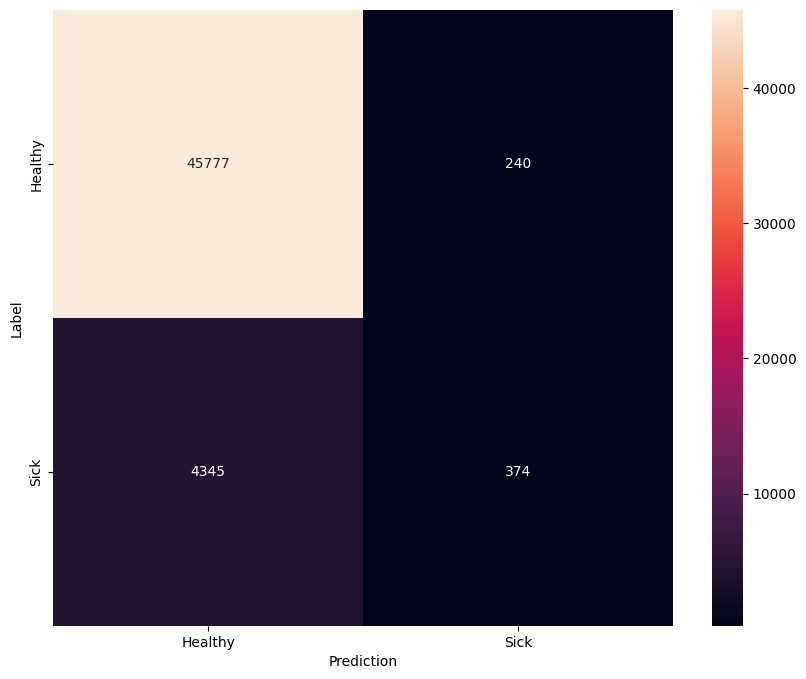


              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     46017
         1.0       0.61      0.08      0.14      4719

    accuracy                           0.91     50736
   macro avg       0.76      0.54      0.55     50736
weighted avg       0.89      0.91      0.88     50736



In [11]:
# Showing the results of the Neural Networks model through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print()
print(classification_report(y_test, predictions))

Result: Great Accuracy, High Bias

Decision Tree Classifier, with and without K-Folds doubling the weight for Sick label

In [12]:
# Create the model
model = DecisionTreeClassifier()

In [13]:
# Create the KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)

In [14]:
X = df.values
y = target.values
sample_weight = tf.where(y_train == 1, 2, 1)

# Iterate over the folds
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the train set
    model.fit(X_train, y_train, sample_weight=sample_weight)

    # Evaluate the model on the test set
    score = model.score(X_test, y_test)
    print(f'Test score: {score:.2f}')

Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85


In [15]:
# Fit the model to the training data and evaluate it on the test set
model.fit(X_train, y_train, sample_weight=sample_weight)
y_pred = model.predict(X_test)

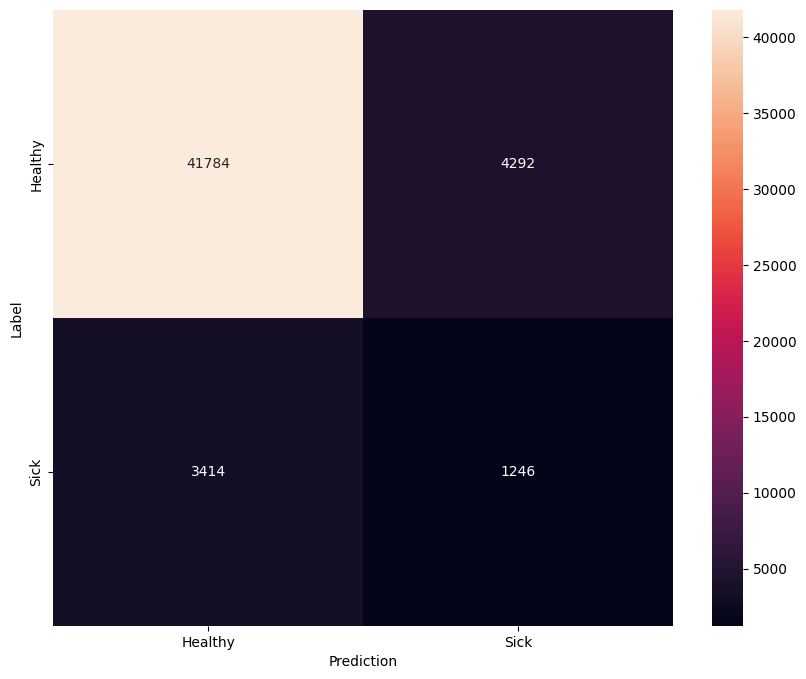


              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     46076
         1.0       0.22      0.27      0.24      4660

    accuracy                           0.85     50736
   macro avg       0.57      0.59      0.58     50736
weighted avg       0.86      0.85      0.85     50736



In [16]:
# Showing the results through a confusion matrix of the Decision Tree Classifier model without K-folds and doubling the weight
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print()
print(classification_report(y_test, y_pred))

Result: Good accuracy and Lower Bias

Random Forest Classifier

In [17]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

In [18]:
# Fit the model to the training data and evaluate it on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

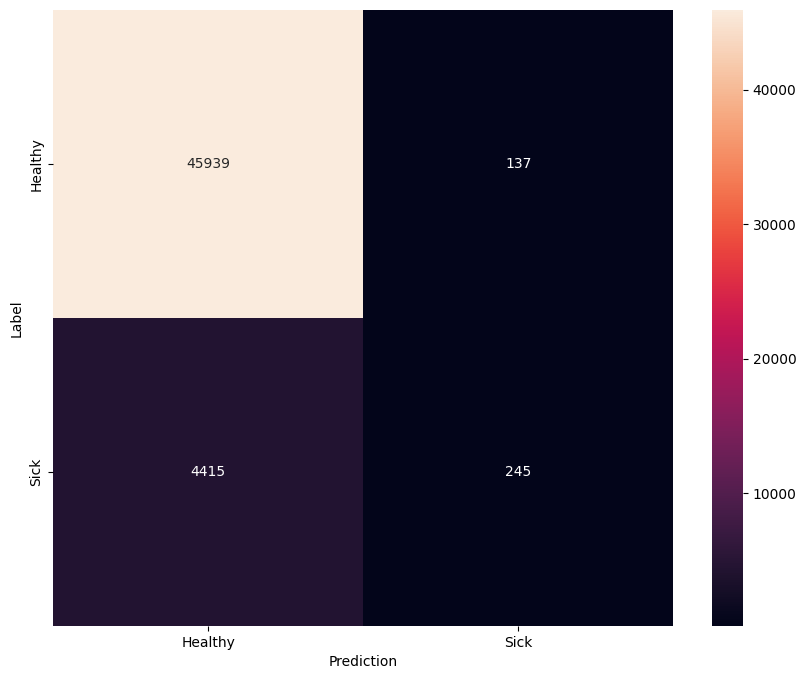


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     46076
         1.0       0.64      0.05      0.10      4660

    accuracy                           0.91     50736
   macro avg       0.78      0.52      0.52     50736
weighted avg       0.89      0.91      0.87     50736



In [19]:
# Showing the results of the Random Forest Classifier through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print()
print(classification_report(y_test, y_pred))

Result: Great Accuracy, High Bias

Neural Networks using SMOTE

In [20]:
X = df.values
y = target.values

# Create a SMOTE object
smote = SMOTE()

# Use the SMOTE object to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [21]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
11490/11490 [==============================] - 27s 2ms/step - loss: 0.4709 - accuracy: 0.7780
Epoch 2/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.4126 - accuracy: 0.8112
Epoch 3/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.3611 - accuracy: 0.8350
Epoch 4/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.3349 - accuracy: 0.8467
Epoch 5/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.3187 - accuracy: 0.8536
Epoch 6/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.3058 - accuracy: 0.8598
Epoch 7/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.2960 - accuracy: 0.8642
Epoch 8/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.2882 - accuracy: 0.8678
Epoch 9/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.2823 - accuracy: 0.8706
Epoch 10/10
11490/11490 [==============================

In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

2873/2873 [==============================] - 7s 2ms/step - loss: 0.2751 - accuracy: 0.8736


In [25]:
predictions = model.predict(X_test)

# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

2873/2873 [==============================] - 4s 1ms/step


In [26]:
# Showing relevant information about the Neural Networks model with SMOTE
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", PredHc)
print("Predicted Sick Subjects:", PredSick)

Subjects: 91915
Actual Healthy Subjects: 46075
Actual Sick Subjects: 45840
Predicted Healthy Subjects: 46830
Predicted Sick Subjects: 45085


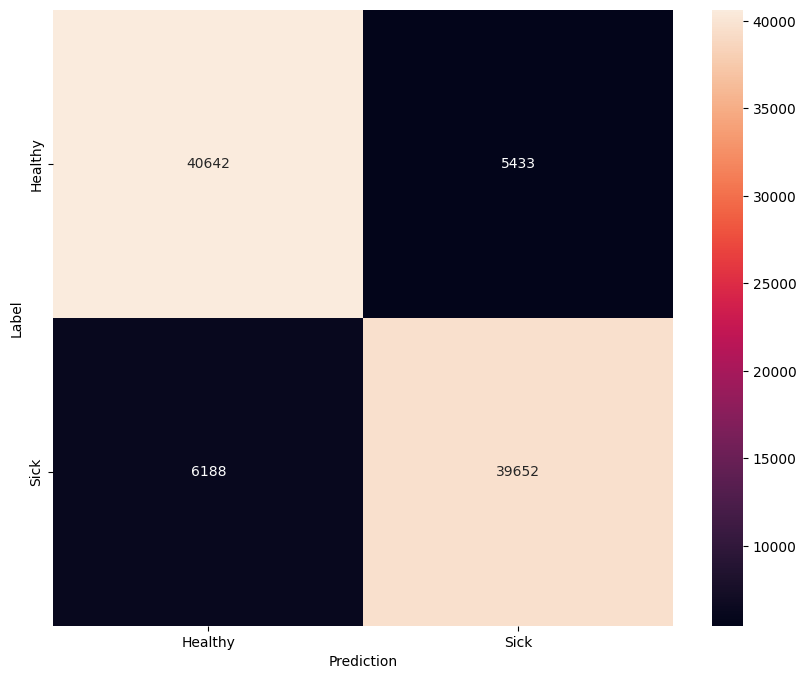

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     46075
         1.0       0.88      0.87      0.87     45840

    accuracy                           0.87     91915
   macro avg       0.87      0.87      0.87     91915
weighted avg       0.87      0.87      0.87     91915



In [27]:
# Showing the results of the NN model with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, predictions))

Result: Good Accuracy and Low Bias

Decision Tree Classifier using SMOTE

In [28]:
X = df.values
y = target.values

# We create a SMOTE object
smote = SMOTE()

# Using the SMOTE object to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# We split the resampled dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Converting the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [29]:
# We create the model
model = DecisionTreeClassifier()

In [30]:
# We fit the model to the training data and evaluate it on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

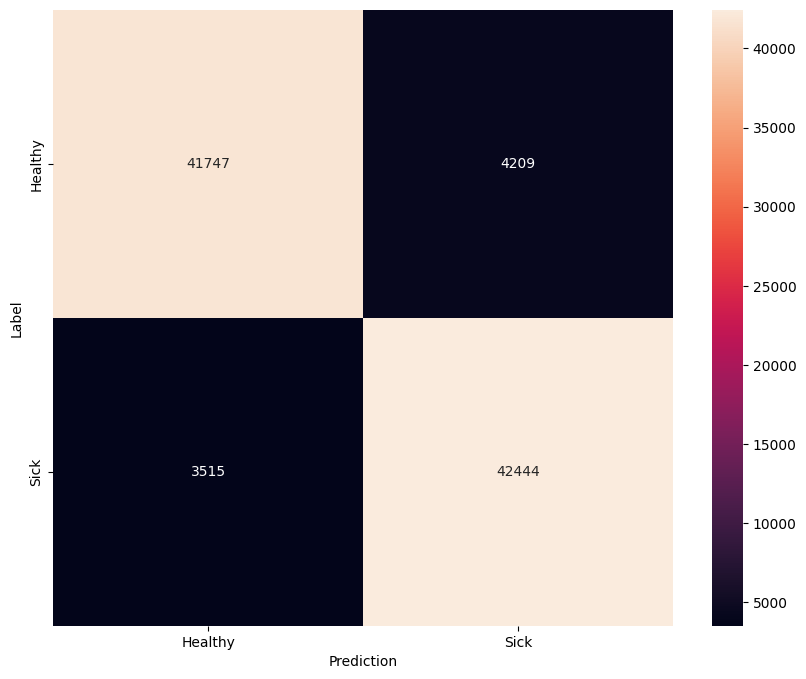

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45956
         1.0       0.91      0.92      0.92     45959

    accuracy                           0.92     91915
   macro avg       0.92      0.92      0.92     91915
weighted avg       0.92      0.92      0.92     91915



In [31]:
# Showing the results of the Decision Tree Classifier with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: Great Accuracy and Low Bias

In [32]:
# We calculate the evaluation metrics and store them in a dictionary
eval_metrics = classification_report(y_test, y_pred, output_dict=True)

# We use the actual number of sick and healthy people given in the dataset
healthy = len(target)-target.sum()
sick = target.sum()

# We calculate the recall, 1-recall, specificity and 1-specificity values
recall = eval_metrics['1.0']['recall']
print("Recall: %.2f" % recall)
nonRecall = 1 - recall
print("1 - Recall: %.2f" % nonRecall)
print()

specificity = eval_metrics['0.0']['recall']
print("Specificity: %.2f" % specificity)
nonSpecificity = 1 - specificity
print("1 - Specificity: %.2f" % nonSpecificity)
print()

# Fixed values
accept = 0.85
notAccept = 1 - accept
plan = 1000
treatment = 50000
success = 0.75
notSuccess = 1 - success

# We calculate the hypothetical cost of the national healthcare system
actualCost = sick * treatment
print("Actual total cost of the national healthcare system: %.2f" % actualCost)
desiredCost = actualCost * 0.8
print("Desired total cost: %.2f" % desiredCost)
reducedCost = actualCost - desiredCost
print("Cost amount that needs to be reduced: %.2f" % reducedCost)
print()

# We calculate the cost of those subjects which are labelled as sick and are truly sick
costR_notAccept = sick * recall * notAccept * treatment
print("Cost of sick labelled and truly sick subjects that did not accept the plan: %.2f" % costR_notAccept)
print()

# We calculate the cost of those subjects which are labelled as healthy but are truly sick
costNR = sick * nonRecall * treatment
print("Cost of healthy labelled and truly sick subjects: %.2f" % costNR)
print()

# We calculate the cost of those subjects which are labelled as sick but are truly healthy
costNS_accept = healthy * nonSpecificity * accept * plan
print("Cost of sick labelled and truly healthy subjects that accepted the plan: %.2f" % costNS_accept)
print()

predCost = actualCost
adhere = 0

while (desiredCost - predCost < 0):
  notAdhere = 1 - adhere
  costR_accept_adhere_success = sick * recall * accept * adhere * success * plan
  costR_accept_adhere_notSuccess = sick * recall * accept * adhere * notSuccess * (plan + treatment)
  costR_accept_notAdhere = sick * recall * accept * notAdhere * (plan + treatment)
  predCost = costR_accept_adhere_success + costR_accept_adhere_notSuccess + costR_accept_notAdhere + costR_notAccept + costNR + costNS_accept
  adhere = adhere + 0.000000001

print("Adherence percentage needed to reduce the cost by 20 percent: %.5f" % (adhere*100))
print()

print("Cost of sick labelled and truly sick subjects that accepted the plan, adhered to it and succeeded: %.2f" % costR_accept_adhere_success)
print()

print("Cost of sick labelled and truly sick subjects that accepted the plan, adhered to it and did not succeed: %.2f" % costR_accept_adhere_notSuccess)
print()

print("Cost of sick labelled and truly sick subjects that accepted the plan and did not adhere to it: %.2f" % costR_accept_notAdhere)
print()
 
print("Predicted total cost: %.2f" % predCost)
print()

balance = desiredCost - predCost 
print("Balance: %.2f" % balance)

Recall: 0.92
1 - Recall: 0.08

Specificity: 0.91
1 - Specificity: 0.09

Actual total cost of the national healthcare system: 1194650000.00
Desired total cost: 955720000.00
Cost amount that needs to be reduced: 238930000.00

Cost of sick labelled and truly sick subjects that did not accept the plan: 165492258.10

Cost of healthy labelled and truly sick subjects: 91368279.34

Cost of sick labelled and truly healthy subjects that accepted the plan: 17888794.95

Adherence percentage needed to reduce the cost by 20 percent: 39.18073

Cost of sick labelled and truly sick subjects that accepted the plan, adhered to it and succeeded: 5511491.69

Cost of sick labelled and truly sick subjects that accepted the plan, adhered to it and did not succeed: 93695358.79

Cost of sick labelled and truly sick subjects that accepted the plan and did not adhere to it: 581763816.67

Predicted total cost: 955719999.53

Balance: 0.47
